<a href="https://colab.research.google.com/github/JorgeSedek/tp3_orga_datos/blob/main/tp3_visus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_test = pd.read_parquet("/content/drive/MyDrive/orgaDatos/TP3 dataset music/test.parquet")

In [ ]:
df_train = pd.read_parquet("/content/drive/MyDrive/orgaDatos/TP3 dataset music/train.parquet")

In [ ]:
def fix_generos(x):
    if x in ["Children’s Music"]:
        return "Children's Music"
    return x
 

df_train.genre = df_train.genre.map(lambda x:fix_generos(x))

In [ ]:
df_cantidad = df_train[["genre"]].value_counts()

In [ ]:
df_cantidad = df_cantidad.to_frame().reset_index().rename(columns = {0:'cantidad'})

In [ ]:
genre_mayor_volumen = list(df_cantidad.iloc[0:5].genre)
genre_mayor_volumen

['Rock', 'Alternative', 'Dance', "Children's Music", 'Pop']

In [ ]:
genre_mayor_volumen2 = list(df_cantidad.iloc[0:15].genre)

In [ ]:
genre_mayor_volumen3 = list(df_cantidad.iloc[0:8].genre)

In [ ]:
df_mayor_volumen = df_train[df_train.genre.map(lambda x: x in genre_mayor_volumen)]
df_mayor_volumen2 = df_train[df_train.genre.map(lambda x: x in genre_mayor_volumen2)]
df_mayor_volumen3 = df_train[df_train.genre.map(lambda x: x in genre_mayor_volumen3)]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Popularidad')

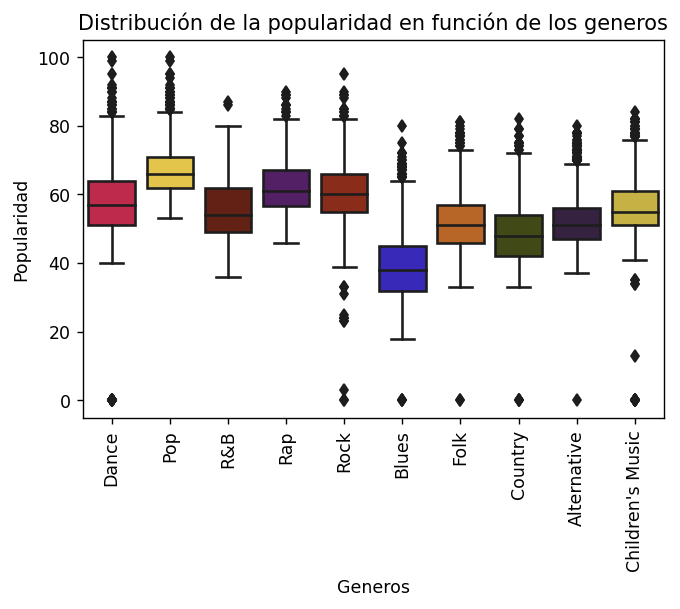

In [ ]:
plt.figure(dpi=125)
sns.boxplot(data=df_mayor_volumen2[["genre","popularity"]], x='genre', y='popularity', palette=["#D6113F","#FCD432","#701809","#591371","#9C1F06","#2711D1","#D06110","#46520F","#371C45","#DBBF30"])
plt.title("Distribución de la popularidad en función de los generos")
plt.xticks(rotation=90)
plt.xlabel("Generos")
plt.ylabel("Popularidad")

Text(0, 0.5, 'Acustica')

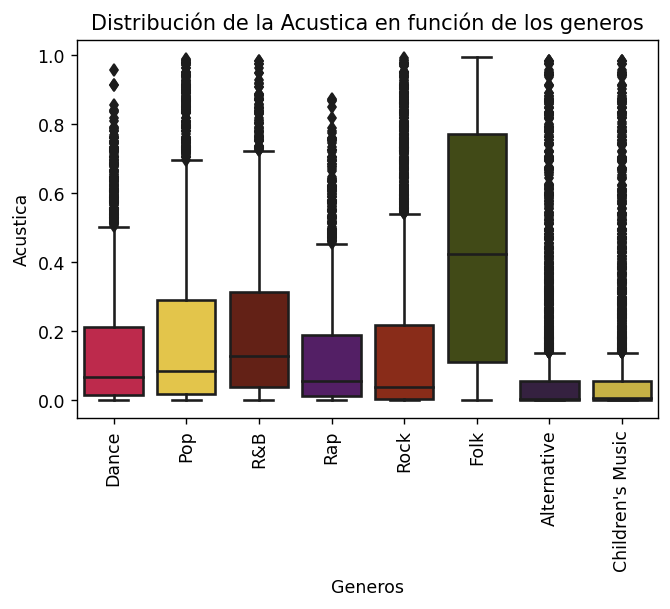

In [ ]:
plt.figure(dpi=125)
sns.boxplot(data=df_mayor_volumen3[["genre","acousticness"]], x='genre', y='acousticness', palette=["#D6113F","#FCD432","#701809","#591371","#9C1F06","#46520F","#371C45","#DBBF30"])
plt.title("Distribución de la Acustica en función de los generos")
plt.xticks(rotation=90)
plt.xlabel("Generos")
plt.ylabel("Acustica")


In [ ]:
genre_mayor_volumen2 = list(df_cantidad.iloc[0:10].genre)
df_mayor_volumen2 = df_train[df_train.genre.map(lambda x: x in genre_mayor_volumen2)]

df_key = df_mayor_volumen2[["genre","key"]]
df_key2 = df_key[df_key.key.notna()]
df_key2["key"] = df_key2.key.astype('string')
df_key2["cantidad"] = 1
df_key3 = df_key2.groupby(['genre','key']).count().reset_index()
matriz = df_key3.pivot_table(values='cantidad', index='genre', columns='key', aggfunc='sum').fillna(0)

matrix2 = matriz.div(matriz.sum(axis=1), axis=0)

matrix2 

key,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
genre,,,,,,,,,,,,
Alternative,0.106116,0.047934,0.087934,0.114380,0.087934,0.113388,0.033058,0.082314,0.068760,0.073058,0.114711,0.070413
Blues,0.154358,0.053892,0.061211,0.124418,0.047239,0.137725,0.031271,0.065868,0.081836,0.038589,0.151697,0.051896
Children's Music,0.102249,0.050949,0.086437,0.117709,0.086788,0.116655,0.033029,0.083626,0.068166,0.076599,0.112087,0.065706
Country,0.105263,0.062456,0.055439,0.133333,0.061754,0.125614,0.046316,0.093333,0.063158,0.057544,0.143860,0.051930
Dance,0.083755,0.060790,0.082405,0.128673,0.112462,0.080716,0.023978,0.073286,0.089497,0.079703,0.115839,0.068896
Folk,0.124498,0.052209,0.065763,0.160141,0.068775,0.117972,0.024598,0.089357,0.079317,0.038655,0.132530,0.046185
Pop,0.081906,0.064780,0.085629,0.122115,0.117647,0.088235,0.033135,0.078183,0.081162,0.069620,0.109456,0.068131
R&B,0.076623,0.059740,0.087662,0.117532,0.124026,0.076623,0.021429,0.064286,0.105844,0.076623,0.100649,0.088961
Rap,0.077051,0.069845,0.099224,0.101996,0.152993,0.078714,0.026053,0.063193,0.078160,0.068736,0.106984,0.077051


Text(68.65277777777787, 0.5, 'genero')

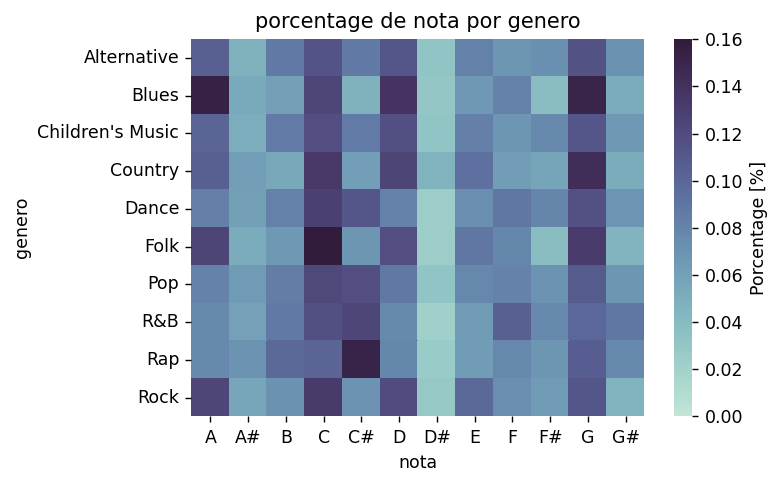

In [ ]:
plt.figure(dpi=125)
plt.title("porcentage de nota por genero")
sns.heatmap(matrix2, square=True, 
            cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),vmin=0, annot_kws={"size": 4},  cbar_kws={'label': 'Porcentage [%]'})
plt.xlabel("nota")
plt.ylabel("genero")

Text(0, 0.5, 'energia')

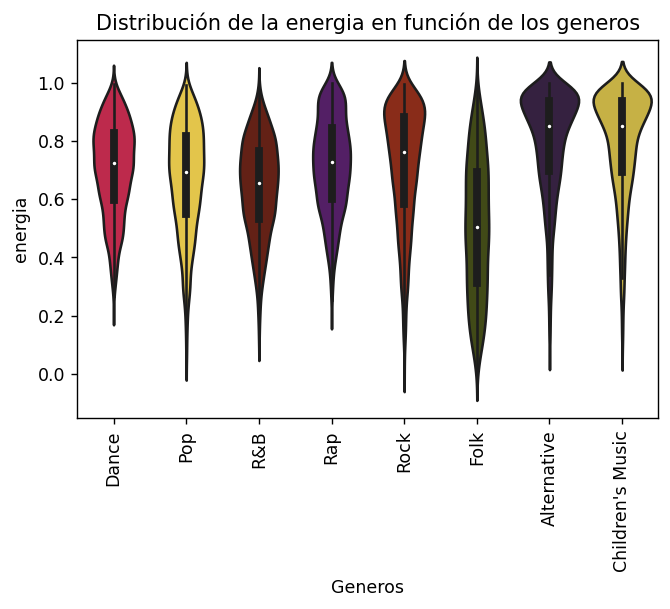

In [ ]:
plt.figure(dpi=125)
sns.violinplot(data=df_mayor_volumen3[["genre","energy"]], x='genre', y='energy', palette=["#D6113F","#FCD432","#701809","#591371","#9C1F06","#46520F","#371C45","#DBBF30"])
plt.title("Distribución de la energia en función de los generos")
plt.xticks(rotation=90)
plt.xlabel("Generos")
plt.ylabel("energia")

In [ ]:
genre_mayor_volumen = list(df_cantidad.iloc[0:5].genre)
genre_mayor_volumen

['Rock', 'Alternative', 'Dance', "Children's Music", 'Pop']

In [ ]:
df_mayor_volumen = df_train[df_train.genre.map(lambda x: x in genre_mayor_volumen)]
df_mayor_volumen["duracion_minutos"] = df_mayor_volumen["duration_ms"].map(lambda x: x/(1000 * 60))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Distribución de los minutos que \n dura una cancion según genero')

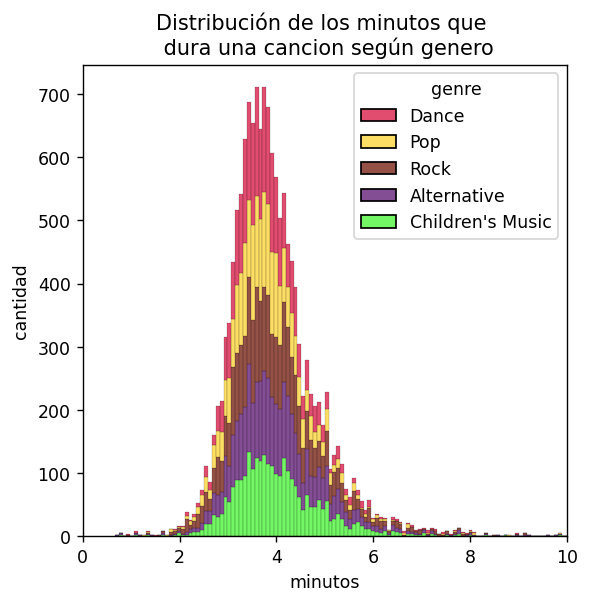

In [ ]:
plt.figure(dpi=125,figsize=(5, 5))
sns.histplot( data = df_mayor_volumen, x = "duracion_minutos", hue = "genre", fill=True,  multiple="stack", palette = ["#D6113F","#FCD432","#701809","#591371","#46F532"])
plt.xlim((0,10))
plt.xlabel("minutos")
plt.ylabel("cantidad")
plt.title("Distribución de los minutos que \n dura una cancion según genero")

Text(0, 0.5, 'danzabilidad')

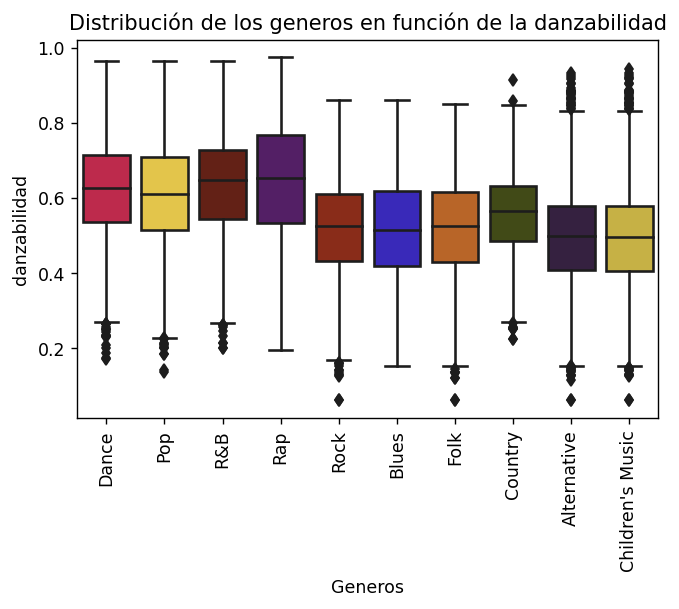

In [ ]:
plt.figure(dpi=125)
sns.boxplot(data=df_mayor_volumen2[["genre","danceability"]], x='genre', y='danceability', palette=["#D6113F","#FCD432","#701809","#591371","#9C1F06","#2711D1","#D06110","#46520F","#371C45","#DBBF30"])
plt.title("Distribución de los generos en función de la danzabilidad")
plt.xticks(rotation=90)
plt.xlabel("Generos")
plt.ylabel("danzabilidad")